# Proyecto Individual de Telecomunicaciones

In [303]:
# importamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Abrimos los datasets

In [304]:
df_accesos_100_hogares = pd.read_excel("d:\\Desktop\\Datasets_Proyectos\\accesos100hogares.xlsx")
df_mapa_conectividad = pd.read_excel("d:\\Desktop\\Datasets_Proyectos\\mapa_conectividad.xlsx")
df_internet = pd.read_excel("d:\\Desktop\\Datasets_Proyectos\\Internet.xlsx")



## Accesos a interner cada 100 hogares

### Kpi 1 = Aumentar en un 2% el acceso al servicio de internet para el próximo trimestre, cada 100 hogares, por provincia.


In [83]:
# Ordenamos por cada provincia, año y trimestre
df_accesos_100_hogares = df_accesos_100_hogares.sort_values(by=["Provincia", "Año", "Trimestre"])

# Agregamos columna con el número de accesos posterior al trimestre
df_accesos_100_hogares['Accesos por cada 100 hogares posterior'] = df_accesos_100_hogares['Accesos por cada 100 hogares'].shift(-1)

In [154]:
df_accesos_100_hogares["Accesos por cada 100 hogares posterior"].astype(str)
df_accesos_100_hogares["Accesos por cada 100 hogares"].astype(str)

960    54.570072879439756
936     55.06141695143392
912    56.754739164071026
888     56.09433653019754
864     56.37048433026737
              ...        
119                 60.34
95                  60.75
71                  61.26
47                  61.04
23                  60.48
Name: Accesos por cada 100 hogares, Length: 984, dtype: object

Valores faltantes: 

In [127]:
df_accesos_100_hogares.info()

<class 'pandas.core.frame.DataFrame'>
Index: 984 entries, 960 to 23
Data columns (total 5 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Año                                     984 non-null    int64  
 1   Trimestre                               984 non-null    int64  
 2   Provincia                               984 non-null    object 
 3   Accesos por cada 100 hogares            984 non-null    float64
 4   Accesos por cada 100 hogares posterior  983 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 46.1+ KB


df_acceso_100_hogares no tiene valores faltantes 

Outliers

In [144]:
# Verificación de outliers usando el método del rango intercuartílico (IQR)
Q1 = df_accesos_100_hogares['Accesos por cada 100 hogares'].quantile(0.25)
Q3 = df_accesos_100_hogares['Accesos por cada 100 hogares'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = df_accesos_100_hogares[(df_accesos_100_hogares['Accesos por cada 100 hogares'] < lower_bound) |
                                  (df_accesos_100_hogares['Accesos por cada 100 hogares'] > upper_bound)]

print(f"{outliers["Accesos por cada 100 hogares"].count()} outliers existen en el dataframe")

20 outliers existen en el dataframe


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7512\1579685879.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_accesos_100_hogares, x='Provincia', y='Accesos por cada 100 hogares', palette="Set3")


<Axes: xlabel='Provincia', ylabel='Accesos por cada 100 hogares'>

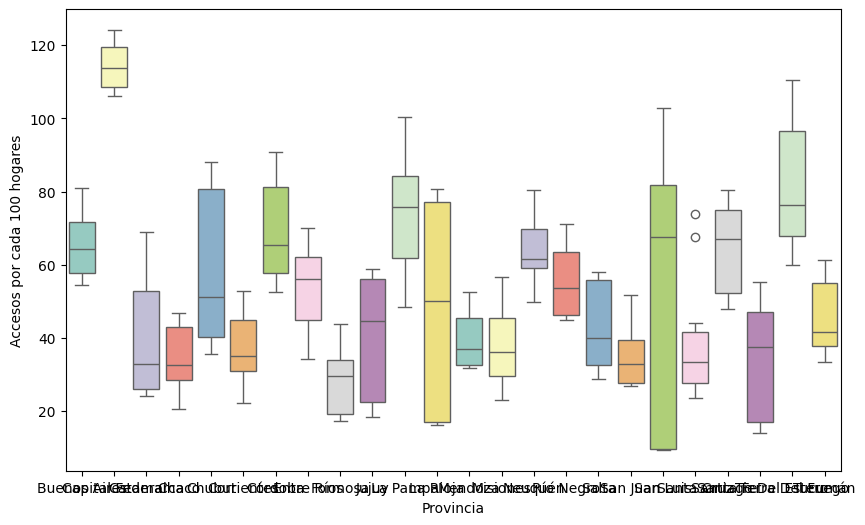

In [153]:
# Graficar los datos y los outliers
plt.figure(figsize=(10,6))
sns.boxplot(data=df_accesos_100_hogares, x='Provincia', y='Accesos por cada 100 hogares', palette="Set3")


Observamos las provincias que tienen outliers

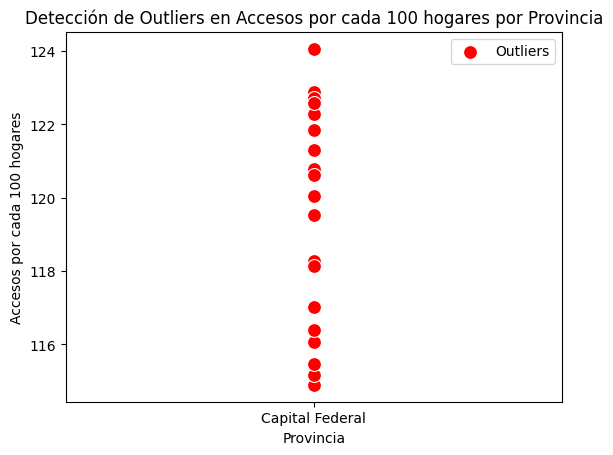

In [151]:
# Marcar los outliers
sns.scatterplot(data=outliers, x='Provincia', y='Accesos por cada 100 hogares', color='red', label='Outliers', s=100)
plt.title('Detección de Outliers en Accesos por cada 100 hogares por Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.show()

Los outliers son de la provincia Capital Federal

Duplicados

In [255]:
# Verificar si hay filas duplicadas en el DataFrame
duplicated_rows = df_accesos_100_hogares[df_accesos_100_hogares.duplicated(subset=["Año","Provincia","Trimestre"])]

# Mostrar el número de filas duplicadas y las filas en sí
num_duplicated = len(duplicated_rows)
print(f"Existen {num_duplicated} duplicados")


Existen 0 duplicados


In [85]:
df_accesos_100_hogares.to_csv("df_accesos_100_hogares.csv")

## Analizamos Internet

In [305]:
# Reemplazar NaN por 0 si es necesario
df_internet.fillna(0, inplace=True)

In [306]:
import pandas as pd
import re

# Definir los rangos en Mbps
rangos = {
    'Muy_baja': (0, 1),
    'Baja': (1, 10),
    'Media': (10, 100),
    'Alta': (100, 500),
    'Muy_alta': (500, 10000)
}

# Inicializar las nuevas columnas en 0
for categoria in rangos:
    df_internet[categoria] = 0

# Iterar sobre todas las columnas del DataFrame
for col in df_internet.columns:
    # Extraer el valor de Mbps del nombre de la columna usando regex
    match = re.search(r'(\d+[\.,]?\d*)\s*Mbps', col)
    if match:
        mbps = float(match.group(1).replace(',', '.'))
        
        
        # Determinar a qué rango pertenece el valor de Mbps
        for categoria, (min_mbps, max_mbps) in rangos.items():

            if min_mbps <= mbps <= max_mbps:
                # Sumar el producto de las conexiones por el valor en Mbps a la columna correspondiente
                df_internet[categoria] += df_internet[col] * mbps

# Crear una lista de nombres de columnas que contienen 'Mbps'
columnas_mbps = [col for col in df_internet.columns if 'Mbps' in col]

# Eliminar las columnas que contienen 'Mbps'
df_internet = df_internet.drop(columns=columnas_mbps)


In [178]:
# Convertir las columnas de velocidad a enteros
df_internet[['Muy_baja', 'Baja', 'Media', 'Alta', 'Muy_alta']] = df_internet[['Muy_baja', 'Baja', 'Media', 'Alta', 'Muy_alta']].astype(int)

# Sumar las columnas de velocidad por cada fila
df_internet['Total_Mbps'] = df_internet[['Muy_baja', 'Baja', 'Media', 'Alta', 'Muy_alta']].sum(axis=1)

In [179]:
# Hacer el merge (join) utilizando las columnas en común
df_internet = pd.merge(df_internet, df_mapa_conectividad, on=['Provincia', 'Partido', 'Localidad'], how='left')

# Borramos columnas que no vamos a utilizar
df_internet = df_internet.drop(columns=["Otros","Link Indec",'ADSL','Cablemódem', 'Dial Up', 'Fibra óptica', 
                                        'Satelital', 'Wireless','Telefonía Fija', '3G', '4G', 'Link', 'Latitud', 'Longitud'])

Valores Faltantes:

In [180]:
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Provincia   3065 non-null   object 
 1   Partido     3065 non-null   object 
 2   Localidad   3065 non-null   object 
 3   Muy_baja    3065 non-null   int32  
 4   Baja        3065 non-null   int32  
 5   Media       3065 non-null   int32  
 6   Alta        3065 non-null   int32  
 7   Muy_alta    3065 non-null   int32  
 8   Total_Mbps  3065 non-null   int64  
 9   Población   2914 non-null   float64
dtypes: float64(1), int32(5), int64(1), object(3)
memory usage: 179.7+ KB


In [193]:
# Filtrar los registros que tienen valore nulos
registros_nulos = df_internet[df_internet.isnull().any(axis=1)]
registros_nulos["Provincia"].value_counts()

Provincia
BUENOS AIRES           65
MENDOZA                20
CORDOBA                11
SAN JUAN                6
ENTRE RIOS              5
MISIONES                4
SANTA FE                4
FORMOSA                 4
NEUQUEN                 3
SAN LUIS                3
SALTA                   3
CHACO                   3
LA RIOJA                3
TUCUMAN                 3
CHUBUT                  2
RIO NEGRO               2
LA PAMPA                2
JUJUY                   2
CORRIENTES              2
SANTIAGO DEL ESTERO     2
CABA                    1
TIERRA DEL FUEGO        1
Name: count, dtype: int64

In [ ]:
print(f"{registros_nulos["Provincia"].sum()} provincias tienen nulos en su poblacion por lo que afectaria el analisis en el dashboards y sus Kpis")
print()


OUTLIERS

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7512\2032805599.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_internet, x='Provincia', y='Total_Mbps', palette="Set3")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7512\2032805599.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_internet, x='Provincia', y='Población', palette="Set3")


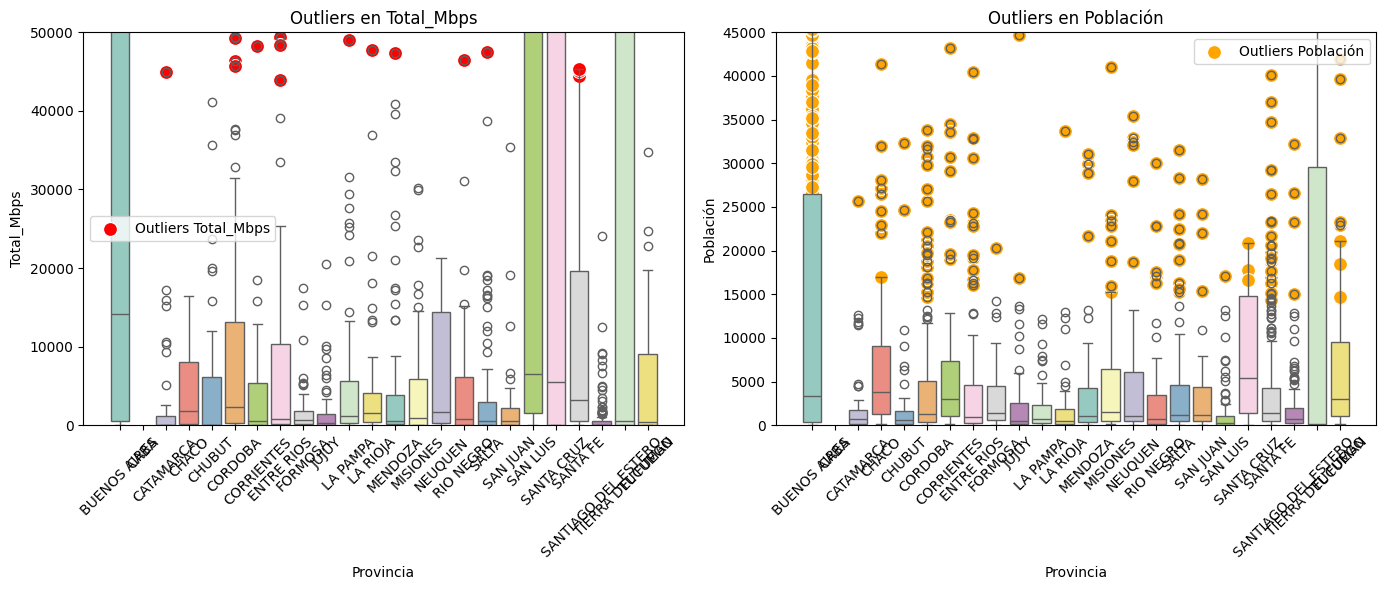

In [274]:
# Verificación de outliers para Total_Mbps
Q1_total = df_internet['Total_Mbps'].quantile(0.25)
Q3_total = df_internet['Total_Mbps'].quantile(0.75)
IQR_total = Q3_total - Q1_total

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

outliers_Mbps = df_internet[(df_internet['Total_Mbps'] < lower_bound_total) | (df_internet['Total_Mbps'] > upper_bound_total)]

# Verificación de outliers para Población
Q1_poblacion = df_internet['Población'].quantile(0.25)
Q3_poblacion = df_internet['Población'].quantile(0.75)
IQR_poblacion = Q3_poblacion - Q1_poblacion

lower_bound_poblacion = Q1_poblacion - 1.5 * IQR_poblacion
upper_bound_poblacion = Q3_poblacion + 1.5 * IQR_poblacion

outliers_Poblacion = df_internet[(df_internet['Población'] < lower_bound_poblacion) | (df_internet['Población'] > upper_bound_poblacion)]

# Graficar los outliers
plt.figure(figsize=(14, 6))

# Subgráfico para Total_Mbps
plt.subplot(1, 2, 1)
sns.boxplot(data=df_internet, x='Provincia', y='Total_Mbps', palette="Set3")
sns.scatterplot(data=outliers_Mbps, x='Provincia', y='Total_Mbps', color='red', label='Outliers Total_Mbps', s=100)
plt.title('Outliers en Total_Mbps')
plt.ylabel('Total_Mbps')
plt.xticks(rotation=45)
plt.ylim(0,50000)
plt.legend()

# Subgráfico para Población
plt.subplot(1, 2, 2)
sns.boxplot(data=df_internet, x='Provincia', y='Población', palette="Set3")
sns.scatterplot(data=outliers_Poblacion, x='Provincia', y='Población', color='orange', label='Outliers Población', s=100)
plt.title('Outliers en Población')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend()
plt.ylim(0,45000)

plt.tight_layout()
plt.show()



In [245]:
# Encontrar registros comunes en outliers haciendo una interseccion con Provincia,Partido,Localidad
registros_comunes = pd.merge(outliers_Mbps, outliers_Poblacion, how='inner', on=['Provincia', 'Partido', 'Localidad'])


Encontramos outliers en Total_Mbps y Poblacion, y registros comunes entre ellos.

In [254]:
print(f"{len(outliers_Mbps)} outliers tienen Total_Mbps y {len(outliers_Poblacion)} outliers tiene Poblacion")
print(f"{len(registros_comunes)} outliers tienen en comun con Total_Mbps y Poblacion")


600 outliers tienen Total_Mbps y 436 outliers tiene Poblacion
372 outliers tienen en comun con Total_Mbps y Poblacion


Duplicados

In [258]:
# Verificar si hay filas duplicadas en el DataFrame
duplicated_rows = df_internet[df_internet.duplicated(subset=["Provincia","Partido","Localidad"])]

# Mostrar el número de filas duplicadas y las filas en sí
num_duplicated = len(duplicated_rows)
print(f"Existen {num_duplicated} duplicados")

Existen 0 duplicados


### Kpi 2 = Nuestro objetivo es aumentarle el 10% a las provincias que tienen baja conectividad, y observar si superan el objetivo del 20% 

In [93]:
df_internet = df_internet.groupby("Provincia").agg({

    'Muy_baja': 'sum', 
    'Baja': 'sum',
    'Media': 'sum',
    'Alta': 'sum',
    'Muy_alta': 'sum',
    'Total_Mbps': 'sum',
    'Población': 'sum'
}).reset_index()

In [94]:
df_internet_provincia = df_internet.groupby('Provincia').agg({
    'Total_Mbps': 'sum',
    'Población': 'sum'
}).reset_index()

In [95]:
df_internet_provincia['Mbps_por_persona'] = df_internet_provincia['Total_Mbps'] / df_internet_provincia['Población']

Estas 10 provincias tienen baja conectividad no superan el 20% propuesto.

In [96]:
df_internet_provincia[df_internet_provincia['Mbps_por_persona'] < 20]

,Provincia,Total_Mbps,Población,Mbps_por_persona
4,CHUBUT,3469631,482103.0,7.196867
8,FORMOSA,6776869,451778.0,15.000440
9,JUJUY,6700653,610401.0,10.977461
10,LA PAMPA,4005399,301683.0,13.276847
12,MENDOZA,18648168,1637373.0,11.389078
16,SALTA,21841175,1098052.0,19.890839
17,SAN JUAN,2933385,615526.0,4.765656
19,SANTA CRUZ,1748362,266539.0,6.559498
21,SANTIAGO DEL ESTERO,7425444,663550.0,11.190482
22,TIERRA DEL FUEGO,1230788,125823.0,9.781900


In [97]:
df_internet_provincia["Baja_Conectividad"] = df_internet_provincia['Mbps_por_persona'] < 20

df_internet_provincia["Baja_Conectividad"].replace(False,"0", inplace=True)
df_internet_provincia["Baja_Conectividad"].replace(True,"1", inplace=True)




Le aumentamos un 10% de Mbps a las provincias y observaremos si las que tienen baja conectividad llegan al objetivo de superar el 20%

In [98]:
# Aumentamos un 10% 
objetivo_mbps = 10
df_internet_provincia['Diferencia_objetivo'] = df_internet_provincia['Mbps_por_persona'] + objetivo_mbps

In [99]:
# Unir el KPI objetivo con el DataFrame original
df_internet = df_internet.merge(df_internet_provincia[['Provincia','Mbps_por_persona','Diferencia_objetivo',"Baja_Conectividad"]], on='Provincia', suffixes=('', '_provincia'))

In [100]:
# Los que tienen infinito lo reemplazamos por 0
df_internet['Mbps_por_persona'].replace([np.inf, -np.inf], 0, inplace=True)


Observamos las provincias que tienen baja conectividad

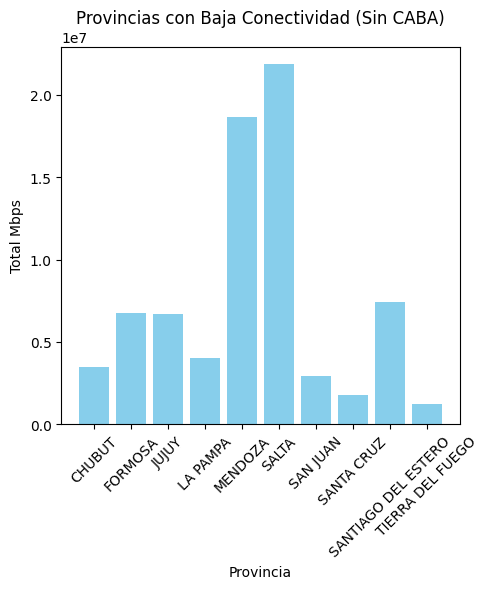

In [164]:
# Filtramos las provincias que tienen baja conectividad
df_baja_conectividad =  df_internet[df_internet['Mbps_por_persona']< 20]

# Filtrar el DataFrame para eliminar la provincia de CABA
df_baja_conectividad_sin_caba = df_baja_conectividad[df_baja_conectividad['Provincia'] != 'CABA']

# Crear gráfico de barras sin la provincia de CABA
plt.figure(figsize=(5, 6))
plt.bar(df_baja_conectividad_sin_caba['Provincia'], df_baja_conectividad_sin_caba['Total_Mbps'], color='skyblue')

plt.title('Provincias con Baja Conectividad (Sin CABA)')
plt.xlabel('Provincia')
plt.ylabel('Total Mbps')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Estas Provincias no llegan a cumplir el Kpi aumentandole un 10%

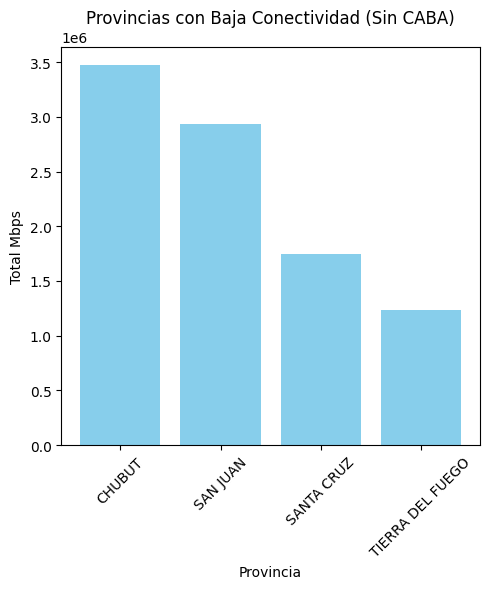

In [163]:
df_aumento_10_porciento = df_baja_conectividad[df_baja_conectividad['Diferencia_objetivo'] < 20]

# Filtrar el DataFrame para eliminar la provincia de CABA
df_baja_conectividad_sin_caba = df_aumento_10_porciento[df_aumento_10_porciento['Provincia'] != 'CABA']

# Crear gráfico de barras sin la provincia de CABA
plt.figure(figsize=(5, 6))
plt.bar(df_baja_conectividad_sin_caba['Provincia'], df_baja_conectividad_sin_caba['Total_Mbps'], color='skyblue')

plt.title('Provincias con Baja Conectividad (Sin CABA)')
plt.xlabel('Provincia')
plt.ylabel('Total Mbps')
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()


In [105]:
df_internet.to_csv("df_internet_Mbps.csv")

## Analizamos mapa_conectividad

In [106]:
# Observamos tipo de datos y existencia de nulos
df_mapa_conectividad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4305 entries, 0 to 4304
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Provincia       4305 non-null   object 
 1   Partido         4305 non-null   object 
 2   Localidad       4305 non-null   object 
 3   Población       4305 non-null   int64  
 4   ADSL            4305 non-null   object 
 5   Cablemódem      4305 non-null   object 
 6   Dial Up         4305 non-null   object 
 7   Fibra óptica    4305 non-null   object 
 8   Satelital       4305 non-null   object 
 9   Wireless        4305 non-null   object 
 10  Telefonía Fija  4305 non-null   object 
 11  3G              4305 non-null   object 
 12  4G              4305 non-null   object 
 13  Link            4293 non-null   float64
 14  Latitud         4305 non-null   float64
 15  Longitud        4305 non-null   float64
dtypes: float64(3), int64(1), object(12)
memory usage: 538.3+ KB


No existen nulos

In [107]:
# Reemplazar "SI" por 1 y "NO" por 0 en todas las columnas o en una columna específica
df_mapa_conectividad.replace({'SI': 1, '--': 0}, inplace=True)

In [108]:
df_mapa_conectividad['Cantidad_Tecnologias'] = df_mapa_conectividad[['ADSL', 'Cablemódem', 'Dial Up', 'Fibra óptica', 'Satelital', 'Wireless', 'Telefonía Fija', '3G', '4G']].sum(axis=1)

Outliers

In [302]:
# Verificación de outliers para Total_Mbps
Q1_total = df_mapa_conectividad['Población'].quantile(0.25)
Q3_total = df_mapa_conectividad['Población'].quantile(0.75)
IQR_total = Q3_total - Q1_total

lower_bound_total = Q1_total - 1.5 * IQR_total
upper_bound_total = Q3_total + 1.5 * IQR_total

outliers = df_mapa_conectividad[(df_mapa_conectividad['Población'] < lower_bound_total) | (df_mapa_conectividad['Población'] > upper_bound_total)]
print(f"Existen {outliers["Población"].count()} outliers ")

Existen 679 outliers 


Graficamos con un boxplot para visualizar en color naranja los outliers

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7512\1757497171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_mapa_conectividad, x='Provincia', y='Población', palette="Set3")


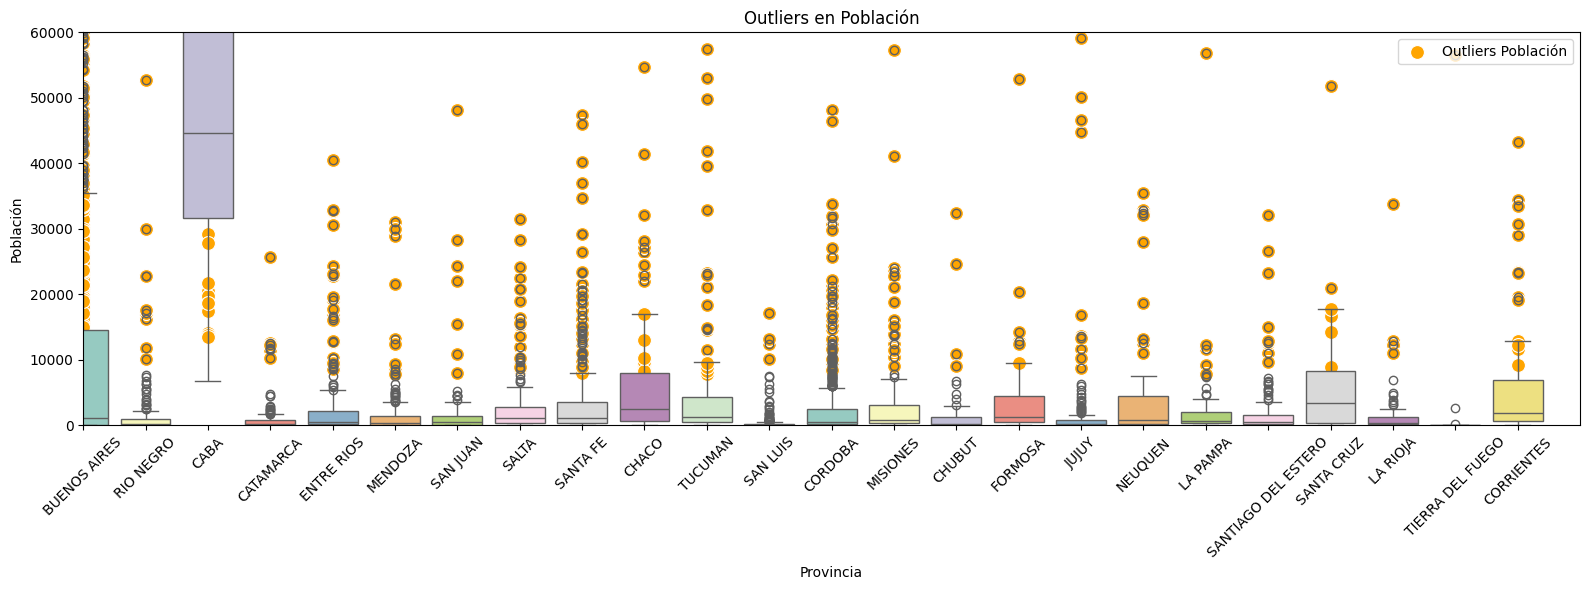

In [297]:
# Subgráfico para Población
plt.figure(figsize=(16, 6))
sns.boxplot(data=df_mapa_conectividad, x='Provincia', y='Población', palette="Set3")
sns.scatterplot(data=outliers, x='Provincia', y='Población', color='orange', label='Outliers Población', s=100)
plt.title('Outliers en Población')
plt.ylabel('Población')
plt.xticks(rotation=45)
plt.legend()

plt.ylim(0,60000)
plt.xlim(0,24)

plt.tight_layout()
plt.show()


Duplicados

In [260]:
# Verificar si hay filas duplicadas en el DataFrame
duplicated_rows = df_mapa_conectividad[df_mapa_conectividad.duplicated(subset=["Provincia","Partido","Localidad"])]

# Mostrar el número de filas duplicadas y las filas en sí
num_duplicated = len(duplicated_rows)
print(f"Existen {num_duplicated} duplicados")

Existen 0 duplicados


### Kpi 3 = Evaluar el impacto de aumentar la conectividad en tecnologías específicas.

In [109]:
# Total de localidades
total_localidades = len(df_mapa_conectividad)

# Localidades con Fibra óptica
localidades_fibra_optica = len(df_mapa_conectividad[df_mapa_conectividad['Fibra óptica'] > 0])

# KPI: Porcentaje de localidades con Fibra óptica
kpi_fibra_optica_localidades = (localidades_fibra_optica / total_localidades) * 100
print(f"Porcentaje de localidades con Fibra óptica: {kpi_fibra_optica_localidades:.2f}%")


Porcentaje de localidades con Fibra óptica: 36.63%


In [110]:
# Población total
poblacion_total = df_mapa_conectividad['Población'].sum()

# Población cubierta por Fibra óptica
poblacion_fibra_optica = df_mapa_conectividad[df_mapa_conectividad['Fibra óptica'] > 0]['Población'].sum()

# KPI: Porcentaje de población con acceso a Fibra óptica
kpi_fibra_optica_poblacion = (poblacion_fibra_optica / poblacion_total) * 100
print(f"Porcentaje de población con acceso a Fibra óptica: {kpi_fibra_optica_poblacion:.2f}%")


Porcentaje de población con acceso a Fibra óptica: 91.30%


In [111]:
objetivo_localidades = 40 # Porcentaje objetivo
localidades_objetivo = (objetivo_localidades / 100) * total_localidades
print(f"Se necesitan {int(localidades_objetivo - localidades_fibra_optica)} localidades más con Fibra óptica para alcanzar el 30%.")


Se necesitan 145 localidades más con Fibra óptica para alcanzar el 30%.


In [112]:
objetivo_poblacion = 80  # Porcentaje objetivo
poblacion_objetivo = (objetivo_poblacion / 100) * poblacion_total
print(f"Se necesitan {int(poblacion_objetivo - poblacion_fibra_optica)} personas más cubiertas por Fibra óptica para alcanzar el 60%.")


Se necesitan -4235612 personas más cubiertas por Fibra óptica para alcanzar el 60%.


In [113]:
df_mapa_conectividad["Fibra óptica"].value_counts()

Fibra óptica
0    2728
1    1577
Name: count, dtype: int64

In [114]:
df_mapa_conectividad.to_csv("df_mapa_conectividad.csv")